<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/StrokeDatasetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mistakes -
1. Forgot to shuffle the dataset. That resulted in baised model always predicting no-stroke class.
2. Forgot to notice the dataset is imbalanced. Used SMOTE sampling technique to generate balance dataset
3. Forgot to drop the id column from the feature set. This resulted in model with precision,recall as 0

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [81]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [82]:
# This shows data with all the strokes positive cases together followed by stroke negative cases. This data needs to be shuffled before sending to model for training
data["stroke"].head(20)

,stroke
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Observation
1. Categorical features - 7
2. Continuous features - 3
3. output - Binary 1/0
Classification Problem


Data Analysis

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [86]:
data = data.drop("id", axis=1)

In [87]:
data.isna().sum() / len(data) * 100

,0
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464
smoking_status,0.000000


There are 201/ 3-percent of the records with BMI value missing. What to do about it.


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 4688 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [89]:
# 5K instances indicates fairly small dataset by machine learning standards
data["smoking_status"].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [90]:
data = shuffle(data, random_state=42)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

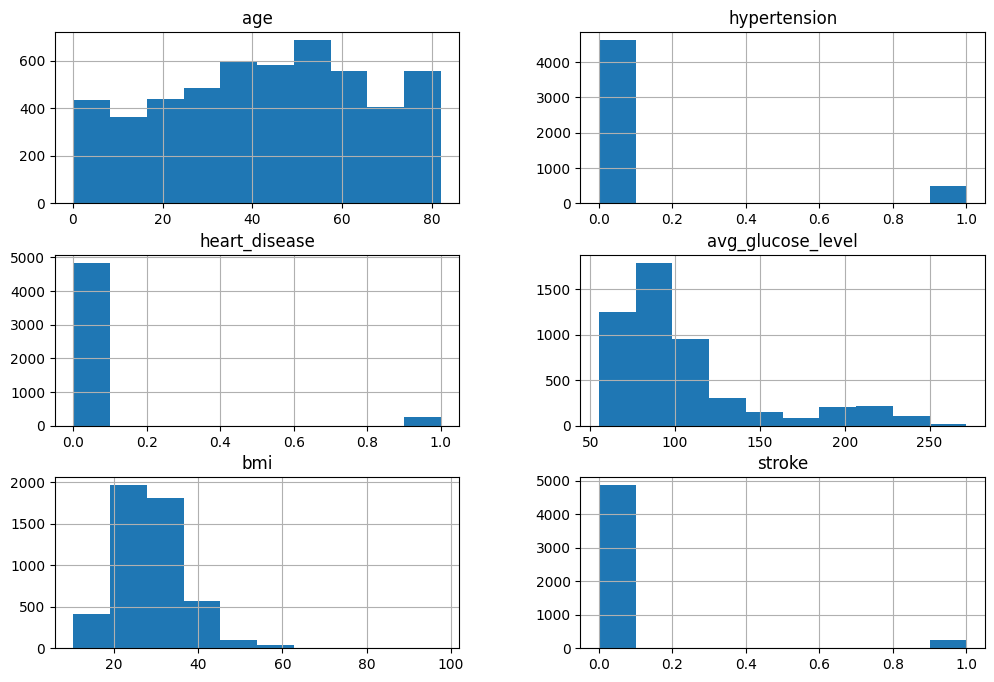

In [91]:
data.hist(figsize=(12,8))

In [92]:
train_set , test_set = train_test_split(data, test_size=0.2, random_state=42)

In [93]:
train_set.shape

(4088, 11)

In [94]:
test_set.shape

(1022, 11)

array([[<Axes: xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <Axes: xlabel='bmi', ylabel='avg_glucose_level'>],
       [<Axes: xlabel='avg_glucose_level', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>]], dtype=object)

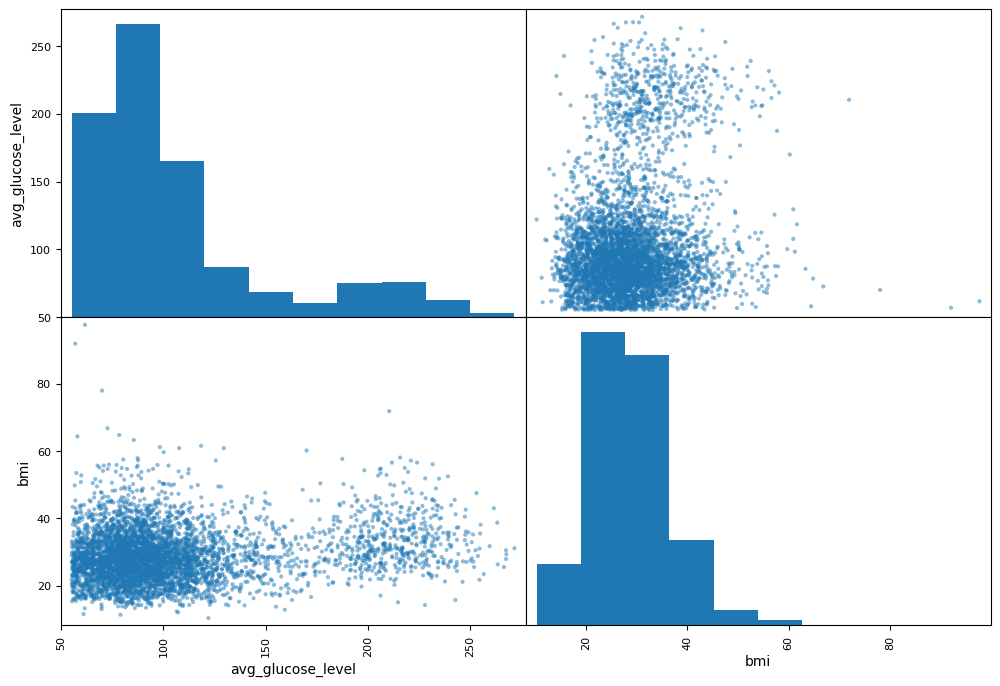

In [95]:
# explore correlations
attributes = ["avg_glucose_level", "bmi"]
scatter_matrix(data[attributes], figsize=(12,8))

In [96]:
imputer = SimpleImputer(strategy="median")
imputer.fit(train_set[["bmi"]])
train_set["bmi"] = imputer.transform(train_set[["bmi"]])
# next try knn-imputer

Handling Categorical data

In [97]:
cat_encoder = OneHotEncoder()
train_set["gender"]  = cat_encoder.fit_transform(train_set[["gender"]]).toarray()
train_set["work_type"] = cat_encoder.fit_transform(train_set[["work_type"]]).toarray()
train_set["Residence_type"] = cat_encoder.fit_transform(train_set[["Residence_type"]]).toarray()
train_set["smoking_status"] = cat_encoder.fit_transform(train_set[["smoking_status"]]).toarray()
train_set["ever_married"] = cat_encoder.fit_transform(train_set[["ever_married"]]).toarray()
train_set.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4984,0.0,31.0,0,0,1.0,0.0,0.0,215.07,28.1,0.0,0
5056,1.0,40.0,0,0,0.0,0.0,0.0,89.61,41.2,0.0,0
97,0.0,58.0,0,1,0.0,0.0,1.0,240.59,31.4,0.0,1
5030,0.0,21.0,0,0,0.0,0.0,1.0,77.42,24.8,0.0,0
1442,1.0,3.0,0,0,1.0,0.0,1.0,68.34,18.0,1.0,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

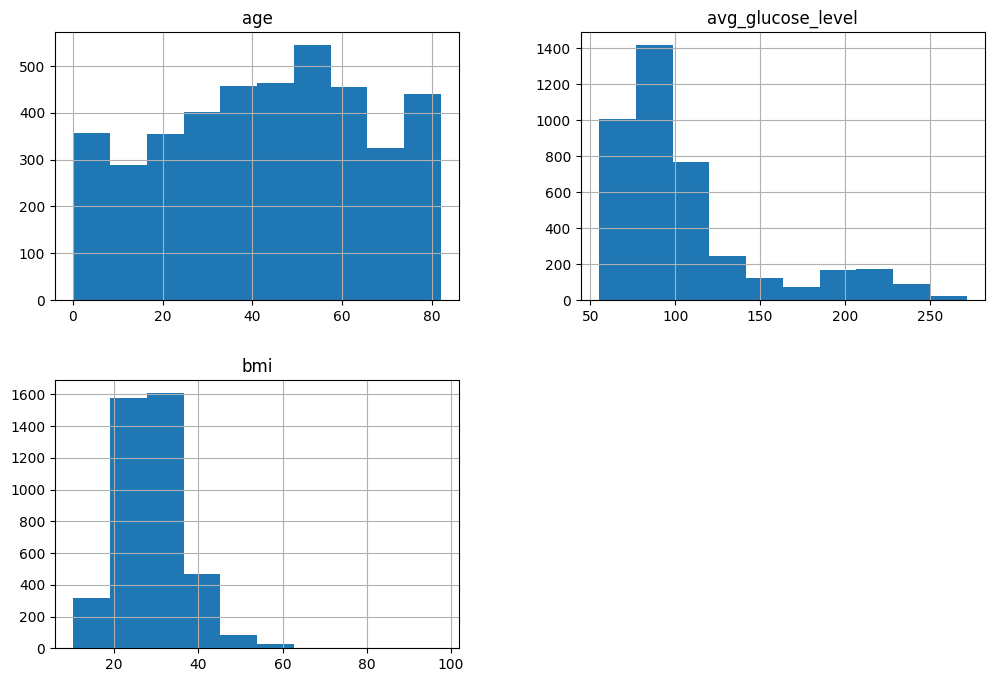

In [98]:
train_set[["age","avg_glucose_level","bmi"]].hist(figsize=(12,8))

**Feature 'avg_glucose_level' has a heavy tail. Before scaling we need to transform it to shrink the heavy tail**

In [99]:
# making the feature distribution Gaussian (normal/bell-shaped)
train_set["avg_glucose_level"] = np.log(train_set["avg_glucose_level"])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

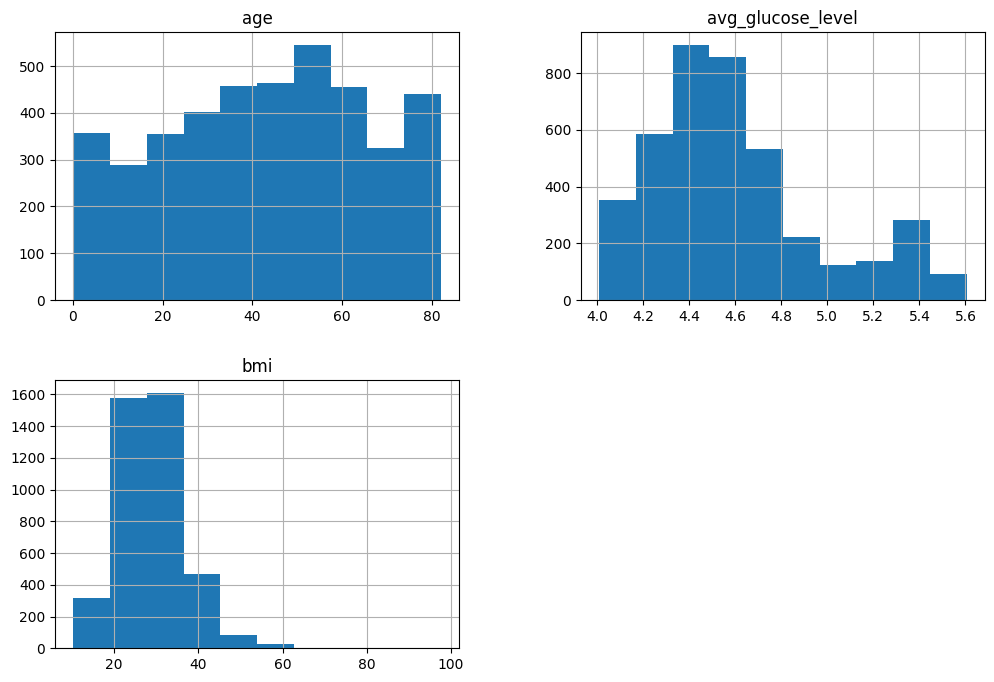

In [100]:
train_set[["age","avg_glucose_level","bmi"]].hist(figsize=(12,8))

In [101]:
from scipy.stats import skew, kurtosis
skewness = skew(train_set['age'])
kurt = kurtosis(train_set['age'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.1315825936218937
Kurtosis: -1.0010101566334573


In [102]:
min_max_scaler = MinMaxScaler()
train_set[["age", "avg_glucose_level", "bmi"]] = min_max_scaler.fit_transform(train_set[["age", "avg_glucose_level", "bmi"]])

In [103]:
train_set.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4984,0.0,0.377441,0,0,1.0,0.0,0.0,0.853396,0.203895,0.0,0
5056,1.0,0.487305,0,0,0.0,0.0,0.0,0.304610,0.353952,0.0,0
97,0.0,0.707031,0,1,0.0,0.0,1.0,0.923683,0.241695,0.0,1
5030,0.0,0.255371,0,0,0.0,0.0,1.0,0.212954,0.166094,0.0,0
1442,1.0,0.035645,0,0,1.0,0.0,1.0,0.134757,0.088202,1.0,0


In [104]:
train_set_y = train_set["stroke"]
train_set_x = train_set.drop("stroke", axis=1)

In [105]:
train_set_y.value_counts()

,count
stroke,
0,3895
1,193


In [106]:
smote = SMOTE(random_state=42)
train_set_x_resampled, train_set_y_resampled = smote.fit_resample(train_set_x, train_set_y)

In [107]:
train_set_y_resampled.value_counts()

,count
stroke,
0,3895
1,3895


In [108]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set_x_resampled, train_set_y_resampled)
cross_val_score(sgd_clf,train_set_x, train_set_y, cv=3, scoring="accuracy")

array([0.95304475, 0.95231108, 0.95301028])

In [109]:
sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(train_set_x_resampled, train_set_y_resampled)
train_pred = cross_val_predict(sgd_clf, train_set_x_resampled, train_set_y_resampled, cv=3)

In [110]:
cm = confusion_matrix(train_set_y_resampled, train_pred)

In [111]:
cm

array([[2851, 1044],
       [ 692, 3203]])

In [112]:
precision_score(train_set_y_resampled, train_pred)

0.7541794207676007

In [113]:
recall_score(train_set_y_resampled, train_pred)

0.8223363286264441

**We see a high accuracy and low precsion,recall metric value for this classification model. This is a hint of class imbalance. Also from the data no of instances of stroke vs no of instances of no-stroke is 1:21. This is highly imbalance dataset. **

In [114]:
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
#tree.fit(train_set_x_resampled, train_set_y_resampled)
tree_predict = cross_val_predict(tree, train_set_x_resampled, train_set_y_resampled, cv=3)
cm_tree = confusion_matrix(train_set_y_resampled, train_pred)
cm_tree

array([[2851, 1044],
       [ 692, 3203]])

In [115]:
precision_score(train_set_y_resampled, tree_predict)

0.901247136675999

In [116]:
recall_score(train_set_y_resampled, train_pred)

0.8223363286264441